In [1]:
import pandas as pd

In [23]:
# create wrapper to call C++ library directly from Python
import ctypes
import pathlib

def cpp_regression_tree(trainPath, testPath):
    # Load the shared library into ctypes
    libname = pathlib.Path().absolute() / "../build/libRegressionTree.dylib"

    c_lib = ctypes.CDLL(libname)
    regressionTree = c_lib.regressionTree

    # response type is a integer pointer
    regressionTree.restype = ctypes.POINTER(ctypes.c_int)

    # argument types are pointers to characters
    regressionTree.argtypes = [ctypes.c_char_p, ctypes.c_char_p]


    with open(testPath) as f:
        first_line = f.readline()
    number_predictions = first_line.count(',') + 1
    
    regressionTreeP = regressionTree(trainPath.encode('utf-8'), testPath.encode('utf-8'))

    # parsing predictions into a list for Python
    predictions = [regressionTree[i] for i in range(number_predictions)]
    
    return predictions

# Dataset preparation

In [4]:
import numpy as np
from random import uniform
from sklearn import datasets
from random import uniform
from numpy.random import normal
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

class Uniform:
    def __init__(self, means, stdevs, n_samples=100, min_x=0.0, max_x=50.0, min_y=0.0, max_y=50.0):
        self.means = means
        self.stdevs = stdevs
        self.n_samples = n_samples
        self.min_x = min_x
        self.max_x = max_x
        self.min_y = min_y
        self.max_y = max_y
        self.boundaries = []
        
    def make_regression(self):
        X = []
        y = []
        for i in range(self.n_samples):
            data_x = uniform(self.min_x, self.max_x)
            data_y = uniform(self.min_y, self.max_y)
            X.append([data_x, data_y])
        self.boundaries = [self.max_x * 0.5 ,self.max_y * 0.5]
        for row in X:
            if (row[0] < self.boundaries[0]) & (row[1] < self.boundaries[1]):
                y.append(np.random.normal(self.means[0], self.stdevs[0]))
            elif (row[0] < self.boundaries[0]) & (row[1] >= self.boundaries[1]):
                y.append(np.random.normal(self.means[1], self.stdevs[1]))
            elif (row[0] >= self.boundaries[0]) & (row[1] < self.boundaries[1]):
                y.append(np.random.normal(self.means[2], self.stdevs[2]))
            else:
                y.append(np.random.normal(self.means[3], self.stdevs[3]))
        return np.array(X), np.array(y)
    
    def plot_dataset(self, X, y):
        plt.scatter(X[:,0], X[:, 1], c=y)
        plt.vlines(self.boundaries[0], 0.0, 50.0)
        plt.hlines(self.boundaries[1], 0.0, 50.0)

In [5]:
def plot_grid(X, y, regressor):
    mx = np.linspace(min(X[:,0]), max(X[:,0]), 101)
    my = np.linspace(min(X[:,1]), max(X[:,1]), 101)
    xx, yy = np.meshgrid(mx, my)
    grid = np.column_stack((xx.ravel(), yy.ravel()))
    plt.scatter(grid[:,0], grid[:, 1], c=regressor.predict(grid), alpha=.05)
    plt.scatter(X[:,0], X[:, 1], c=y)

In [7]:
dataset = Uniform([5, 10, 15, 20], [1.0, 1.0, 1.0, 1.0])
X, y = dataset.make_regression()

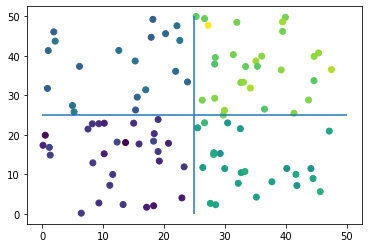

In [8]:
dataset.plot_dataset(X,y)

In [14]:
train_df = pd.DataFrame(data=zip(X[:,0], X[:,1],y), columns=['x', 'y', 'target'])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(train_df, random_state=1)

In [16]:
X_train

,x,y,target
35,26.288343,28.775438,19.894197
94,27.627568,2.658976,15.325277
27,9.319916,2.768668,5.259524
46,41.365973,25.465145,20.310103
38,36.524273,26.506663,18.422284
...,...,...,...
75,29.956142,26.209004,20.793983
9,19.239638,13.369212,4.567077
72,44.673611,39.842902,20.805195
12,31.392048,40.293364,19.762360


In [19]:
# need to transpose to be compatible with C++ library
X_train.T.to_csv("./test/resources/train.csv", header=False, index=False)

In [21]:
# remove outcomes from test
X_test.drop(columns='target').T.to_csv("./test/resources/test.csv", header=False, index=False)

In [22]:
X_test.target

80     6.835640
84     5.853376
33    13.751008
81    20.426414
93    20.355625
17    16.405236
36     6.094049
82    20.582423
69     8.811013
65    13.555116
92     5.758268
39     9.651752
56     3.959449
52    14.781476
51    10.933915
32    19.764478
31    18.713559
44     6.689341
78     9.096388
10     9.108782
2     21.100359
73    10.825824
97    19.275304
62     5.357880
19    16.108532
Name: target, dtype: float64

In [24]:
# read data csvs into C++ library and return predictions
predictions = cpp_decision_tree("./test/resources/train.csv", "./test/resources/test.csv")

OSError: dlopen(/Users/margotgeerts/Documents/CPP-DecisionTreeRegressor/CPP-DecisionTreeRegressor/../build/libDecisionTree.dylib, 0x0006): tried: '/Users/margotgeerts/Documents/CPP-DecisionTreeRegressor/CPP-DecisionTreeRegressor/../build/libDecisionTree.dylib' (no such file), '/usr/local/lib/libDecisionTree.dylib' (no such file), '/usr/lib/libDecisionTree.dylib' (no such file)